In [1]:
import matplotlib.pyplot as plt
import numpy as np
import codemodule as cm
from scipy.integrate import trapz 

In [2]:
plt.style.use("bmh")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 13,
    "axes.titlesize": 13,
    "axes.labelsize":13,
    "font.sans-serif": ["Helvetica"],
    "axes.facecolor": "#ffffff",
    "figure.autolayout": True,
    })

In [3]:
def name_gen(N,L,lag,ty,size):
    return 'RP_N{:},{:}_L{:}_mr_CD_lag{:}_type{:}_size{:}.dat'.format(N[0],N[1],L,lag,ty,size)

In [5]:
N = [256,256]
Ls = ['046.78','050.40','055.47','063.50']
lags = [1,2,5,10,20,50]
types = [1,2]
bounds = [2,3,5,10]

In [6]:
data_dict = {}
for Lind,L in enumerate(Ls):
    for lagind,lag in enumerate(lags):
        for tyind,ty in enumerate(types):
            for boundind,bound in enumerate(bounds):
                data = np.loadtxt(f'./L{L}/'+name_gen(N,L,lag,ty,bound))
                data_dict[(L,lag,ty,bound)] = data

In [7]:
colors = {1:'red',2:'blue'}
markers = {2:'x',3:'o',5:'v',10:'d'}

/home/konsti/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


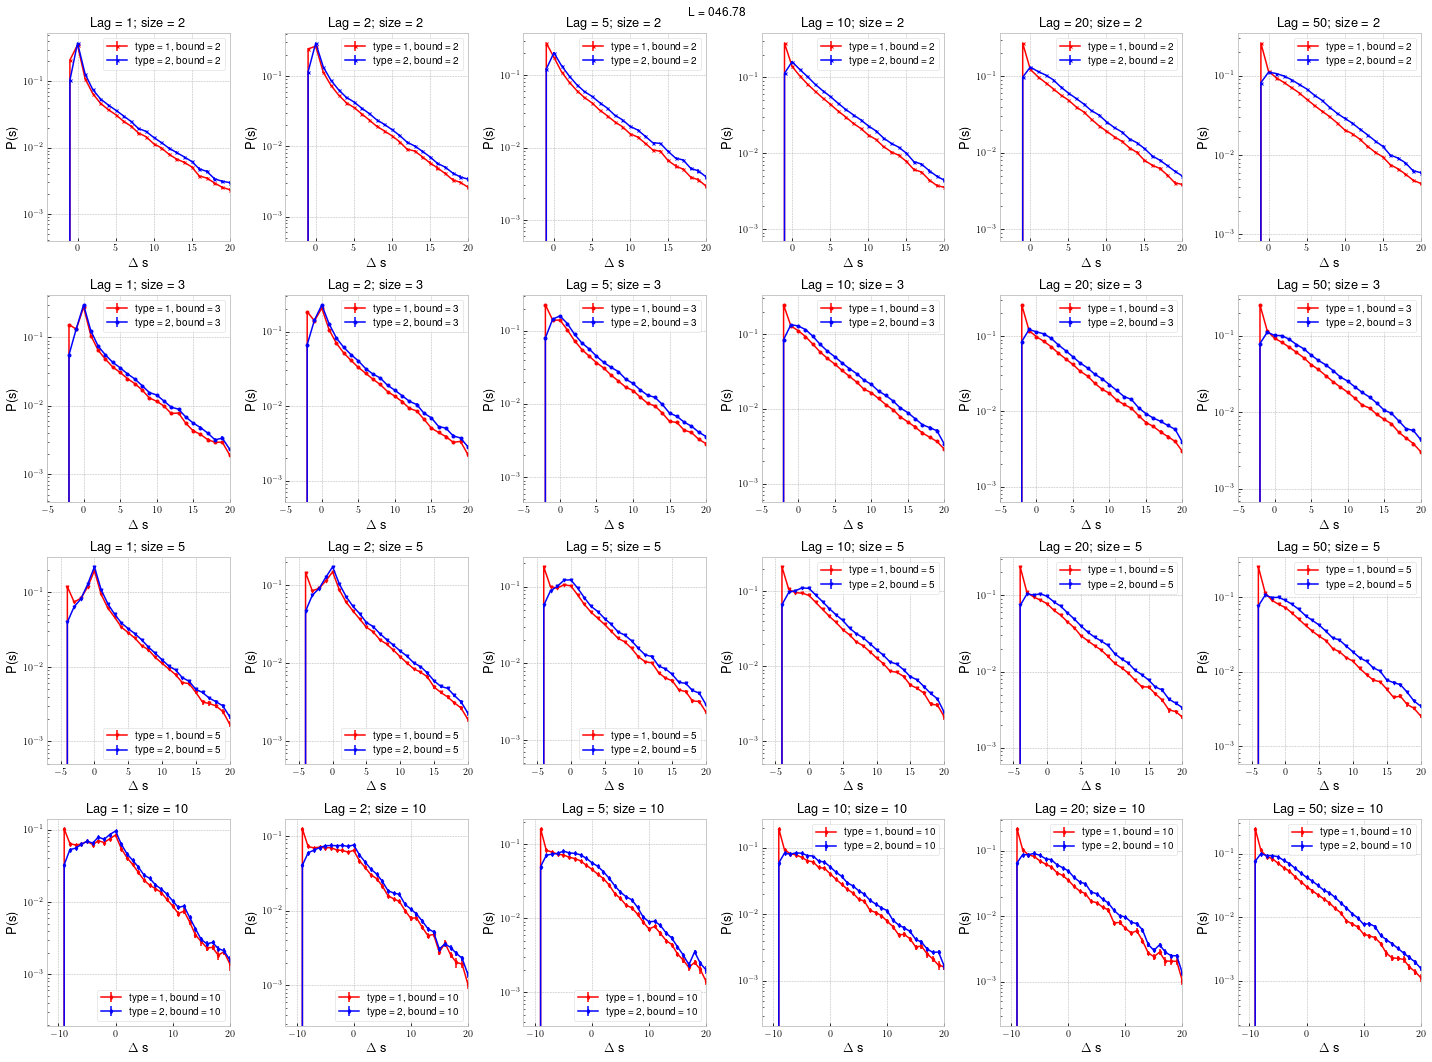

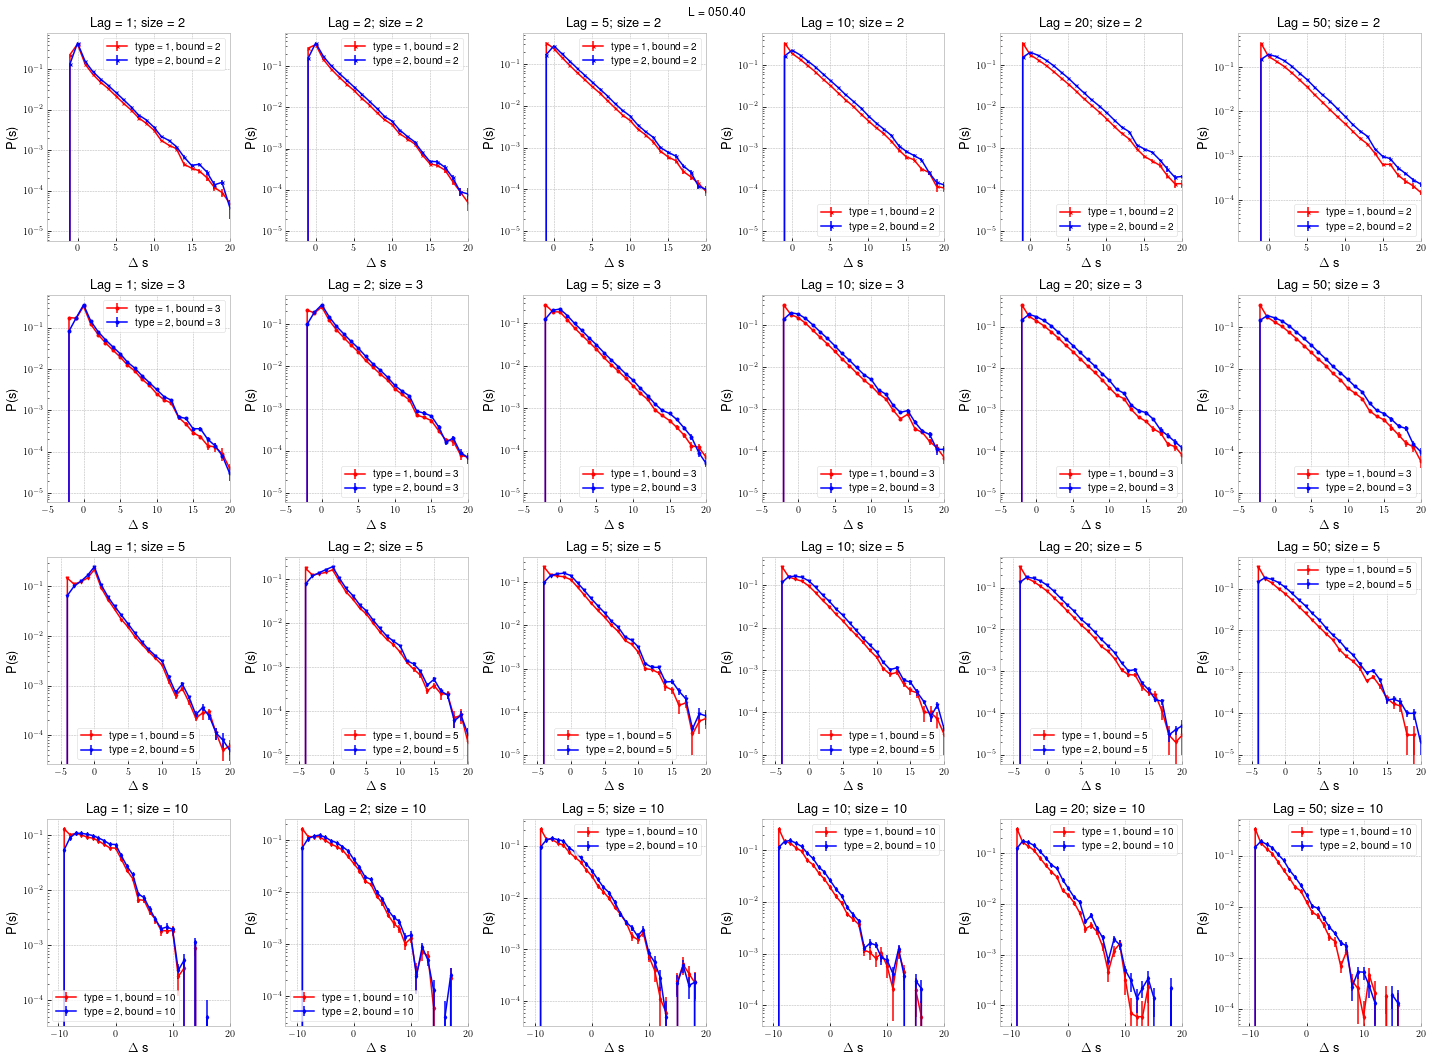

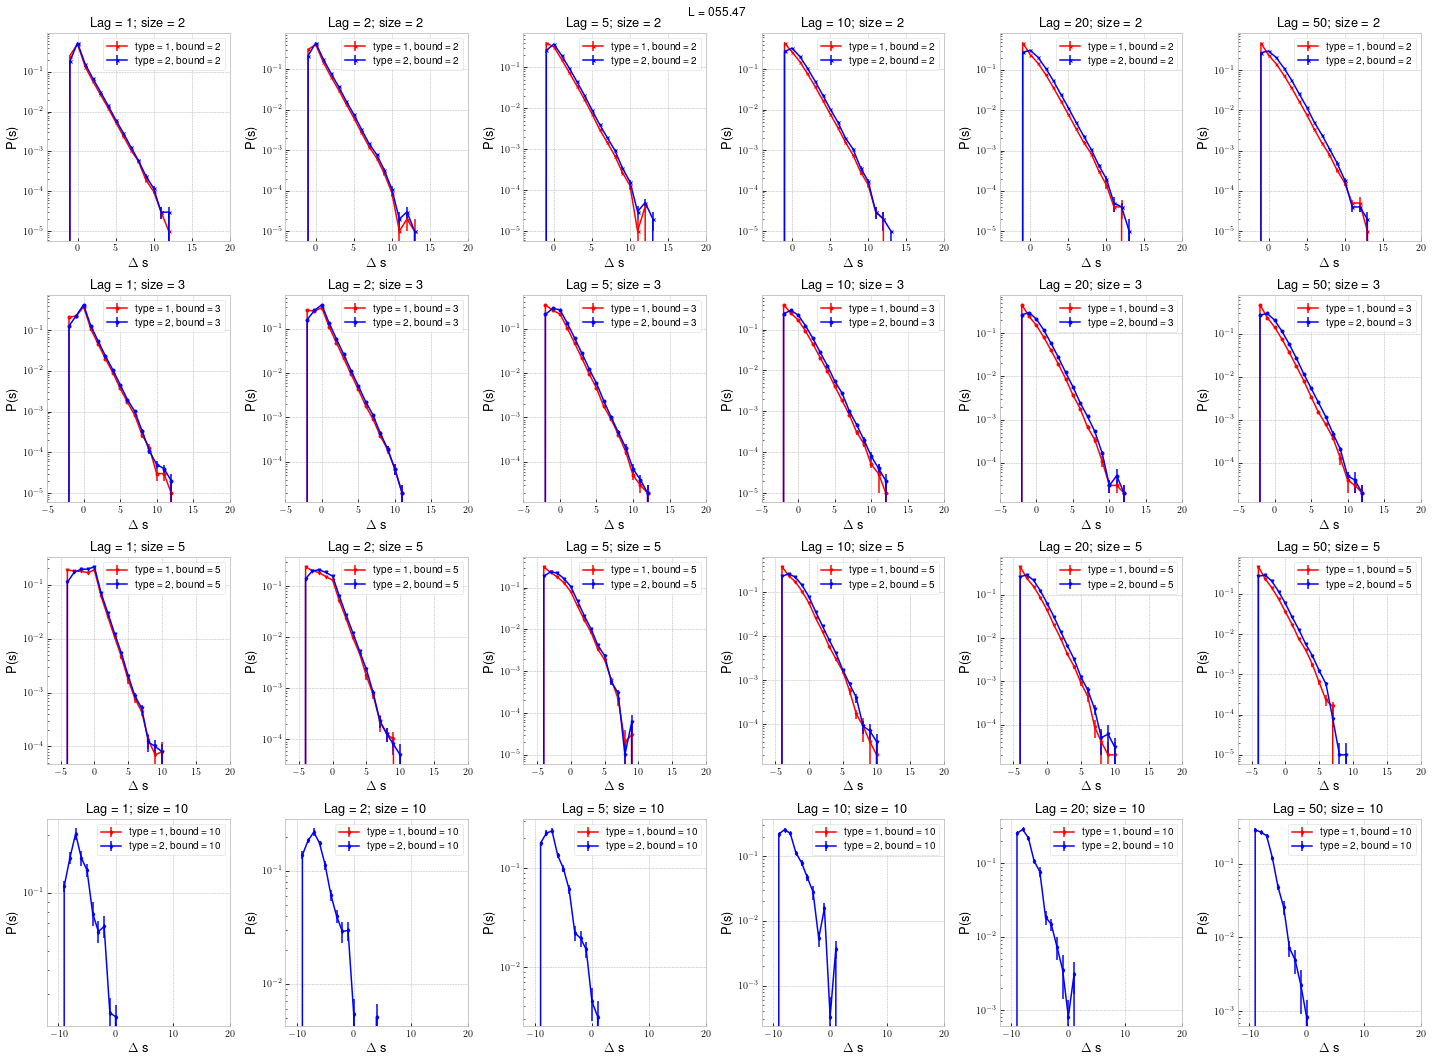

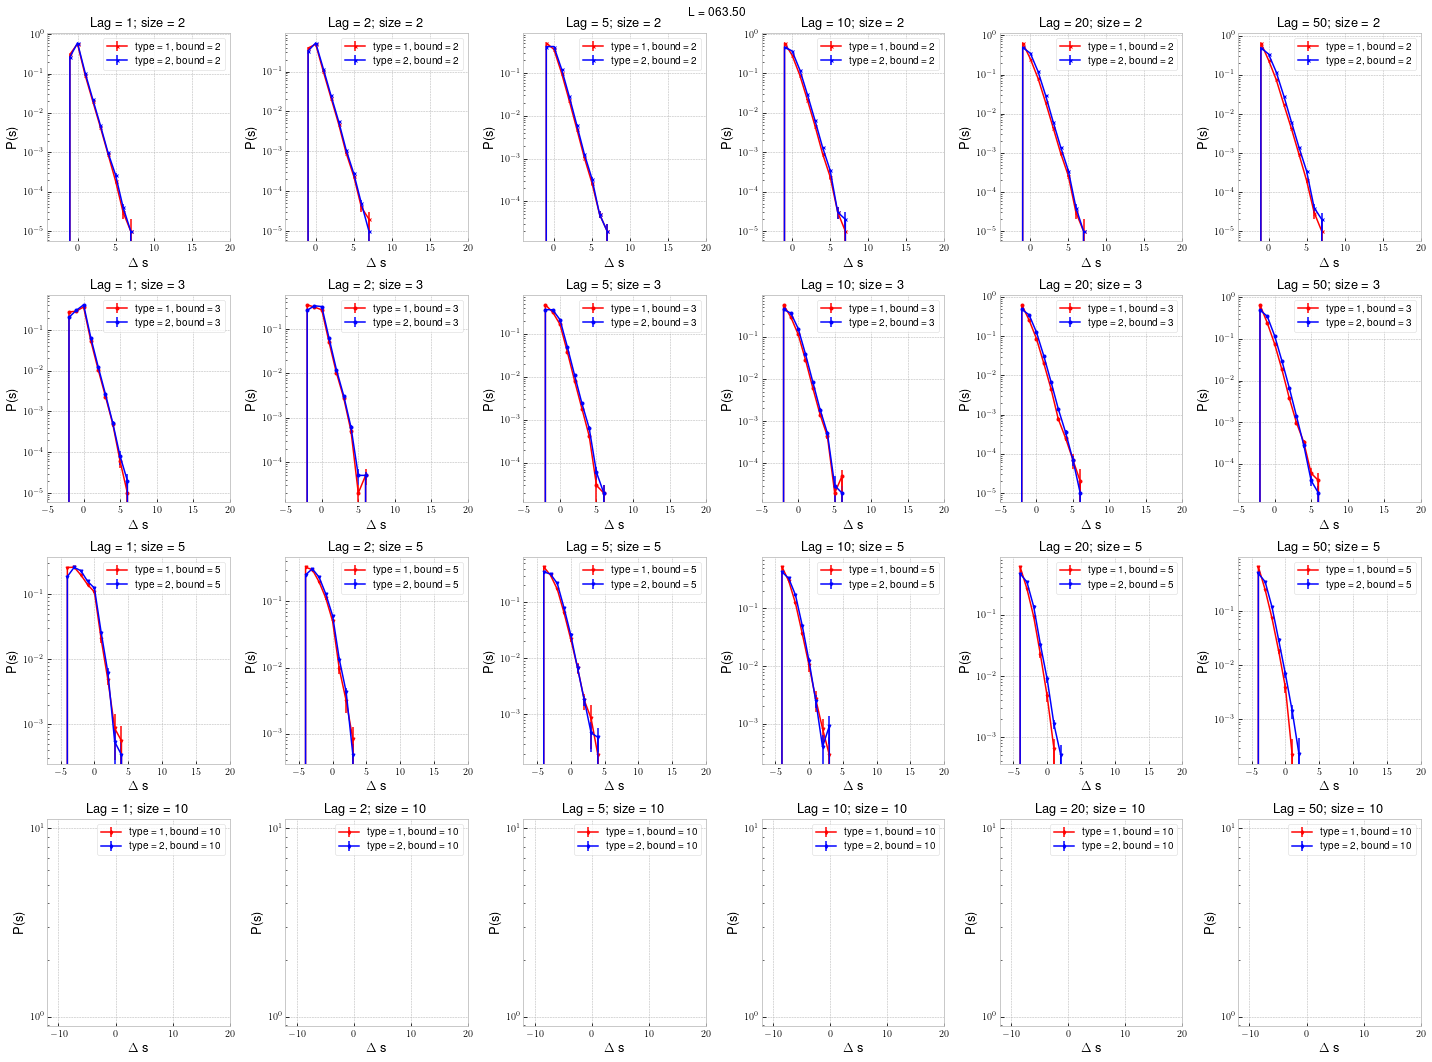

In [27]:
for Lind,L in enumerate(Ls):
    fig,axs = plt.subplots(len(bounds),len(lags),figsize=(20,15))
    fig.suptitle(f'L = {L}')
    for lagind,lag in enumerate(lags):
        for tyind,ty in enumerate(types):
            for boundind,bound in enumerate(bounds):
                data = np.array(data_dict[(L,lag,ty,bound)])
                norm = 1
                axs[boundind][lagind].errorbar(data[:,0],data[:,1]/norm,yerr=data[:,2]/norm,marker = markers[bound],markersize = 3.0,color = colors[ty],label = 'type = {:}, bound = {:}'.format(ty,bound),linewidth = 1.5)
                axs[boundind][lagind].legend()
                axs[boundind][lagind].set_xlabel('$\\Delta$ s')
                axs[boundind][lagind].set_ylabel('P(s)')
                axs[boundind][lagind].set_title(f'Lag = {lag}; size = {bound}')
                axs[boundind][lagind].set_xlim(-bound-2,20)
                axs[boundind][lagind].set_yscale('log')
    plt.savefig(f'./plots/distribution_L{L}.pdf')

In [19]:
Pshrink_dict = {}
for Lind,L in enumerate(Ls):
    for tyind,ty in enumerate(types):
        for boundind,bound in enumerate(bounds):
            collect = np.zeros((len(lags),3))
            for lagind,lag in enumerate(lags):
                collect[lagind,0] = lag
                data = data_dict[L,lag,ty,bound]
                dx = np.diff(data[:,0])[0]
                collect[lagind,1] =np.sum(data[:,1][data[:,0]<0]*dx)
                err = dx*np.sqrt(np.sum((data[:,2][data[:,0]<0])**2))
                collect[lagind,2] = err
            Pshrink_dict[(L,ty,bound)] = collect

/home/konsti/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


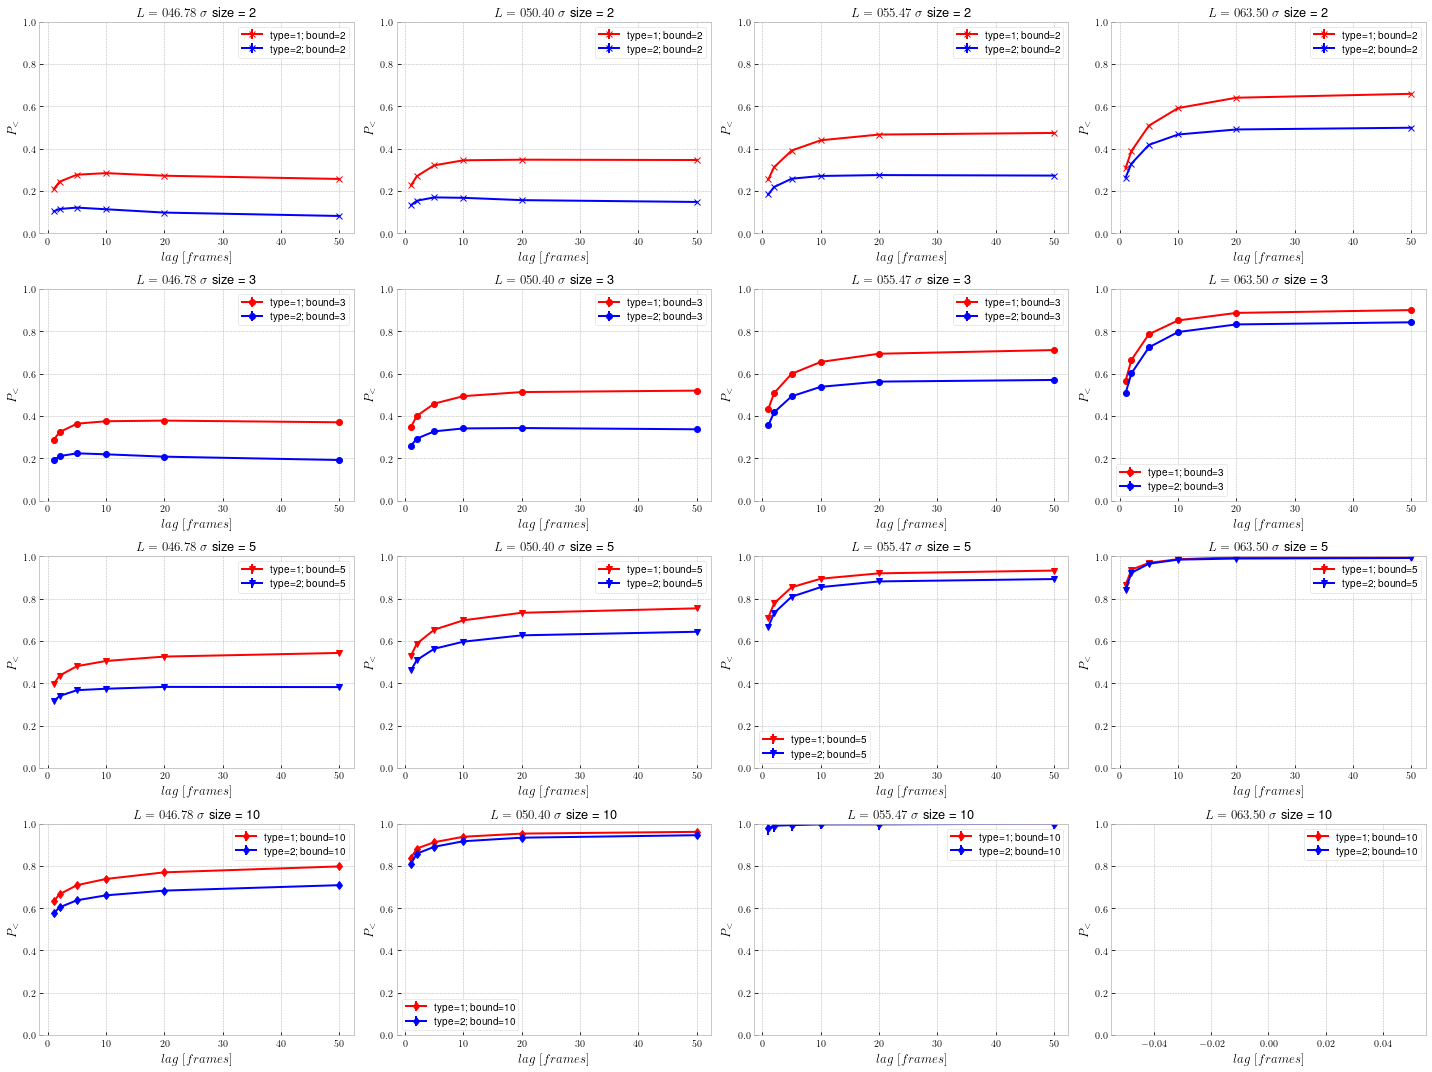

In [26]:
colors = {1:'red',2:'blue'}
markers = {2:'x',3:'o',5:'v',10:'d'}


fig,axs = plt.subplots(len(bounds),len(Ls),figsize=(20,15))
for Lind,L in enumerate(Ls):
    for tyind,ty in enumerate(types):
        for boundind,bound in enumerate(bounds):
            data = np.array(Pshrink_dict[(L,ty,bound)])
            axs[boundind][Lind].errorbar(data[:,0],data[:,1],yerr=data[:,2],color=colors[ty],marker = markers[bound],label=f'type={ty}; bound={bound}')
            axs[boundind][Lind].legend()
            axs[boundind][Lind].set_ylim(0.0,1.0)
            axs[boundind][Lind].set_xlabel('$lag \ [frames]$')
            axs[boundind][Lind].set_ylabel('$P_<$')
            axs[boundind][Lind].set_title(f'$L = {L} \ \sigma$ size = {bound} ')
            #axs[boundind][Lind].set_yscale('log')
fig.savefig('./plots/P_shrink.pdf')

NameError: name 'part_inds' is not defined

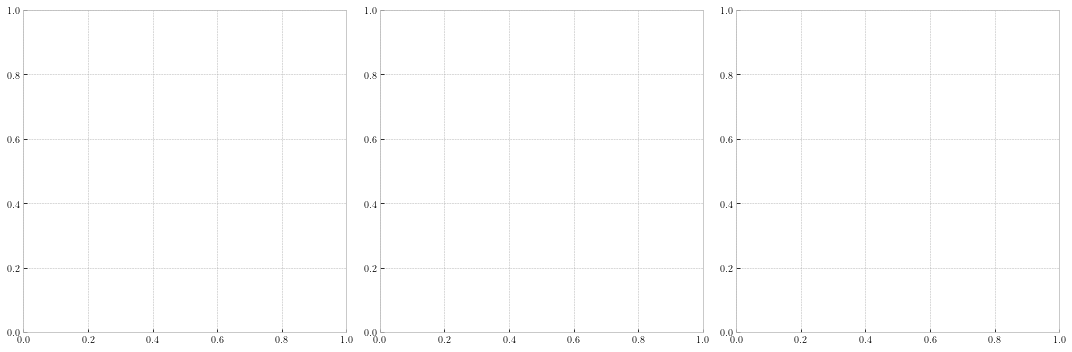

In [11]:
fig,axs = plt.subplots(1,3, figsize = (15,5))
colors = {part_inds[0]:'blue',part_inds[1]:'red'}
#linestyles = {bounds[0]:'solid',bounds[1]:'dashed'}
linestyles = {bounds[0]:'solid'}
y_labels = ['P<','P0','P>']
for i in range(3):
    for partind,part in enumerate(part_inds):
        for bind,bound in enumerate(bounds):
            axs[i].plot(lags,res_P[partind,i,:,bind],marker = 'v',label = f'partind = {part}; bound = {bound}',color = colors[part],linestyle = linestyles[bound])
        #axs[iprint(lind)].plot(lags,np.mean(res_P[:,i,:],axis = 0))
            axs[i].legend()
            axs[i].set_ylabel(y_labels[i])
            axs[i].set_xlabel('lag time')
            axs[i].set_ylim(0.0,1.0)
plt.show()
#fig.savefig(f'./meeting_7.9/change_distP_L{L}.pdf')